In [3]:
"""
### Assignment 1: FFT Fundamentals and Properties
**Duration:** 45-60 minutes  
**Difficulty:** ⭐⭐☆☆☆

#### Objectives
- Build intuition for what FFT actually computes
- Verify theoretical properties with code
- Compare manual DFT implementation with NumPy FFT

#### Tasks
1. **Implement DFT from scratch** for N=8, 16 using the mathematical definition:
   ```python
   X[k] = Σ(n=0 to N-1) x[n] * e^(-j*2π*k*n/N)
   ```

2. **Generate test signals:**
   - Pure sinusoid: `x[n] = cos(2π*f*n/fs)`
   - Complex exponential: `x[n] = e^(j*2π*f*n/fs)`
   - Sum of sinusoids with different frequencies

3. **Verify FFT properties:**
   - Linearity: FFT(ax + by) = a*FFT(x) + b*FFT(y)
   - Time shift: FFT(x[n-k]) = e^(-j*2π*k*m/N) * FFT(x[n])
   - Frequency shift: FFT(x[n]*e^(j*2π*k*n/N)) = X[m-k]
   - Parseval's theorem: Energy in time = Energy in frequency

4. **Visualization requirements:**
   - Plot magnitude and phase spectra
   - Compare your DFT vs NumPy FFT results
   - Show before/after for each property verification

#### Expected Output
- Functions: `manual_dft()`, `verify_linearity()`, `verify_time_shift()`
- Plots: Magnitude/phase spectra comparisons
- Verification: All properties should match theoretical predictions within numerical precision

#### Key Insights to Gain
- FFT is just an efficient way to compute DFT
- Phase information is as important as magnitude
- Discrete frequency bins correspond to specific frequencies


# resources:
1. dft explained https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/
"""

"\n### Assignment 1: FFT Fundamentals and Properties\n**Duration:** 45-60 minutes  \n**Difficulty:** ⭐⭐☆☆☆\n\n#### Objectives\n- Build intuition for what FFT actually computes\n- Verify theoretical properties with code\n- Compare manual DFT implementation with NumPy FFT\n\n#### Tasks\n1. **Implement DFT from scratch** for N=8, 16 using the mathematical definition:\n   ```python\n   X[k] = Σ(n=0 to N-1) x[n] * e^(-j*2π*k*n/N)\n   ```\n\n2. **Generate test signals:**\n   - Pure sinusoid: `x[n] = cos(2π*f*n/fs)`\n   - Complex exponential: `x[n] = e^(j*2π*f*n/fs)`\n   - Sum of sinusoids with different frequencies\n\n3. **Verify FFT properties:**\n   - Linearity: FFT(ax + by) = a*FFT(x) + b*FFT(y)\n   - Time shift: FFT(x[n-k]) = e^(-j*2π*k*m/N) * FFT(x[n])\n   - Frequency shift: FFT(x[n]*e^(j*2π*k*n/N)) = X[m-k]\n   - Parseval's theorem: Energy in time = Energy in frequency\n\n4. **Visualization requirements:**\n   - Plot magnitude and phase spectra\n   - Compare your DFT vs NumPy FFT resul

In [5]:
# imports
import numpy as np
from numbers import Complex
import matplotlib.pyplot as plt

In [6]:
def odd_sum(n: int) -> float:
    result = 0
    for n, i in enumerate(range(1, n+1, 2)):
        if n > 0 and n % 2 !=0:
             result -= 1/i
        else:
            result += 1/i
    return result
       

In [7]:
odd_sum(10000), np.pi/4

(0.7853481633979478, 0.7853981633974483)

In [8]:
# FFT
signal = [-1, -0.5, 0.5, 0.8]

frequency = np.fft.fft(signal)
frequency

array([-0.2+0.j , -1.5+1.3j, -0.8+0.j , -1.5-1.3j])

In [9]:
# ifft
signal = np.fft.ifft(frequency)
signal

array([-1. +0.j, -0.5+0.j,  0.5+0.j,  0.8+0.j])

In [10]:
x = np.array(signal)
N = x.shape[0]
n = np.arange(N)
k = n.reshape((N, 1)) #  we need to reshape it for n * k to produce shape(n,n)

# X⃗ =M⋅x⃗
# Mkn=e−i 2π k n / N.
M = np.exp(-2j*np.pi*k*n/N)

xk  = np.dot(M, x)
xk, xk.shape == x.shape


(array([-0.2+0.00000000e+00j, -1.5+1.30000000e+00j, -0.8-1.10218212e-16j,
        -1.5-1.30000000e+00j]),
 True)

In [18]:
def plot_function(
    x: np.ndarray, 
    y: np.ndarray, 
    title: str, 
    x_title: str | None = None, 
    y_title: str | None = None
):
    fig, ax = plt.subplots()
    ax.plot(x, y, markeredgewidth=1)
    ax.set_title(title)
    if y_title:
        ax.set_ylabel(y_title)
    if x_title:
        ax.set_xlabel(x_title)

    plt.show()

def plot_multiple(pairs: list[tuple[np.ndarray, np.ndarray]], title: str):
    fig, ax = plt.subplots()
    for x, y in pairs:
        ax.plot(x, y, markeredgewidth=1)
    ax.set_title(title)
    # if y_title:
    #     ax.set_ylabel(y_title)
    # if x_title:
    #     ax.set_xlabel(x_title)
    plt.show()


In [12]:
def slow_dft(x: np.ndarray) -> np.ndarray[Complex]:

    # x = np.array(signal) # convert to ndarray
    N = x.shape[0]       # find N - size of the 1d array
    n = np.arange(N)     # range of N with integers 
    k = n.reshape((N, 1))# column vector to produce a matrix by multiplication
    M = np.exp(-2j*np.pi*n*k/N)
    return np.dot(M, x)

In [14]:
x = np.random.random(1024)
np.allclose(slow_dft(x), np.fft.fft(x))

True

In [27]:
%timeit slow_dft(x)
%timeit np.fft.fft(x)

16.6 ms ± 227 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.6 μs ± 17.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [15]:

def fft(x: np.ndarray, cutoff: int = 32):
    """
    1. **Implement DFT from scratch** for N=8, 16 using the mathematical definition:
    ```python
    X[k] = Σ(n=0 to N-1) x[n] * e^(-j*2π*k*n/N)
    ```
    """

    N = x.shape[0]
    if N % 2 > 0:
        raise ValueError('N should be power of 2')
    elif N <= cutoff:
        return slow_dft(x)
    else:
        X_even = fft(x[::2])  # select even from observed signals,  size N/2
        X_odd = fft(x[1::2]) # select odd from observed signals,    size N/2
        factor = np.exp( -2j * np.pi * np.arange(N) / N)

        first_half = factor[ ( N // 2) :]
        second_half = factor[ : (N // 2) ]
        return np.concat([
            X_even + second_half * X_odd,  # multiply second part of factor arr by odd
            X_even + first_half * X_odd,
        ])



In [65]:
np.allclose(fft(x), np.fft.fft(x))

True

In [36]:
"""
2. **Generate test signals:**
   - Pure sinusoid: `x[n] = cos(2π*f*n/fs)`
   - Complex exponential: `x[n] = e^(j*2π*f*n/fs)`
   - Sum of sinusoids with different frequencies
"""
f = 20  # freq in Herz
fs = 2*f # sample rate: samples per secod
duration = 1.0  # duration in seconds
N = int(duration * fs)  # amount of samples
n = np.arange(N)

sinusoid_signal = np.cos(2 * np.pi * f * n / fs)
complex_exp_signal = np.exp(2j * np.pi * f * n / fs)

sin_sum_signal = np.cos(2*np.pi * f / 2 * n / fs) + np.cos(2*np.pi * 2 * f * n / fs)

# x = np.linspace(-np.pi, np.pi, 100)
# sin_signal = np.cos(x)

In [32]:
complex_exp_signal

array([ 1.+0.00000000e+00j, -1.+1.22464680e-16j,  1.-2.44929360e-16j,
       -1.+3.67394040e-16j,  1.-4.89858720e-16j, -1.-1.16403344e-15j,
        1.-7.34788079e-16j, -1.+8.57252759e-16j,  1.-9.79717439e-16j,
       -1.-2.45053156e-15j,  1.+2.32806688e-15j, -1.-2.20560220e-15j,
        1.-1.46957616e-15j, -1.-1.96067284e-15j,  1.-1.71450552e-15j,
       -1.-1.71574348e-15j,  1.-1.95943488e-15j, -1.-1.47081412e-15j,
        1.+4.90106312e-15j, -1.-1.22588476e-15j,  1.+4.65613376e-15j,
       -1.-9.80955401e-16j,  1.+4.41120440e-15j, -1.-7.84145340e-15j,
        1.-2.93915232e-15j, -1.-4.91096681e-16j,  1.+3.92134568e-15j,
       -1.+6.85926004e-15j,  1.-3.42901104e-15j, -1.-1.23796127e-18j,
        1.+3.43148696e-15j, -1.-6.86173596e-15j,  1.-3.91886976e-15j,
       -1.+1.46994755e-14j,  1.+2.94162824e-15j, -1.+7.83897748e-15j,
        1.+9.80212624e-15j, -1.+9.78479478e-16j,  1.+2.45176952e-15j,
       -1.+8.32883620e-15j])

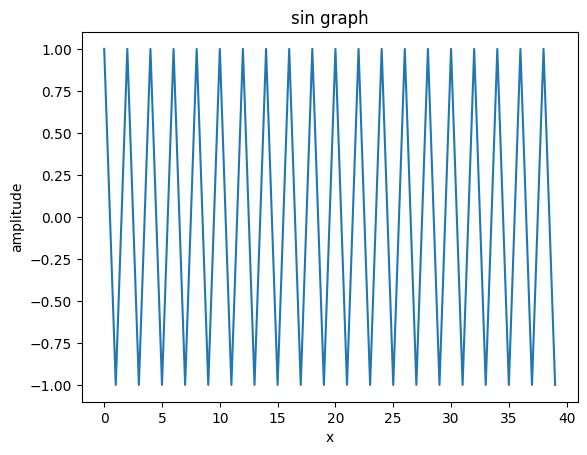

In [34]:
# plot_function(x, sin_signal, 'sin graph', 'x', 'amplitude')
plot_function(n, sinusoid_signal, 'sin graph', 'x', 'amplitude')

/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


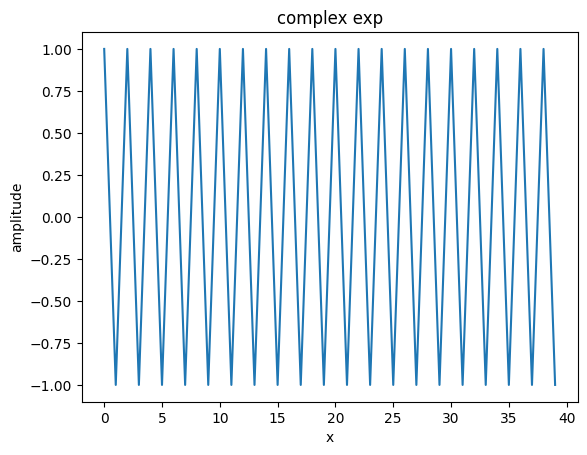

In [37]:
plot_function(n, complex_exp_signal, 'complex exp', 'x', 'amplitude')

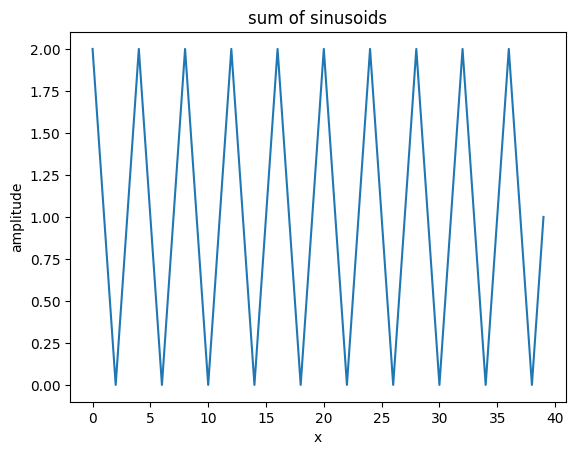

In [38]:
plot_function(n, sin_sum_signal, 'sum of sinusoids', 'x', 'amplitude')

/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


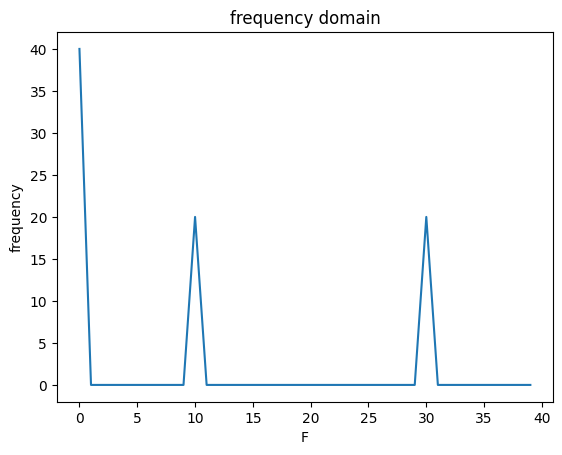

In [42]:
fourier_signal = fft(sin_sum_signal)
plot_function(n, fourier_signal, 'frequency domain', 'F', 'frequency')

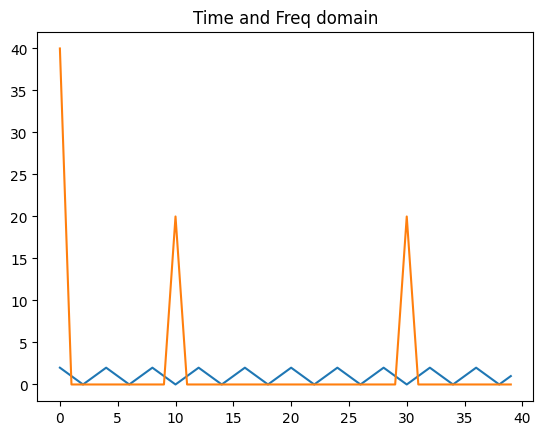

In [48]:
# plot_function(n, fourier_signal, 'frequency domain', 'F', 'frequency')

plot_multiple([
    (n, sin_sum_signal),
    (n, fourier_signal)
], title='Time and Freq domain')

/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


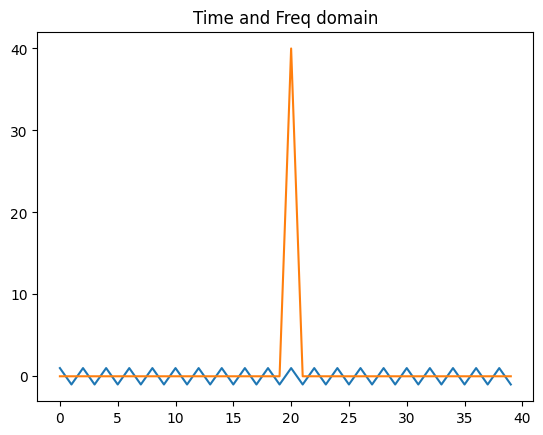

In [49]:
# plot_function(n, fourier_signal, 'frequency domain', 'F', 'frequency')

plot_multiple([
    (n, sinusoid_signal),
    (n, fft(sinusoid_signal))
], title='Time and Freq domain')

/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


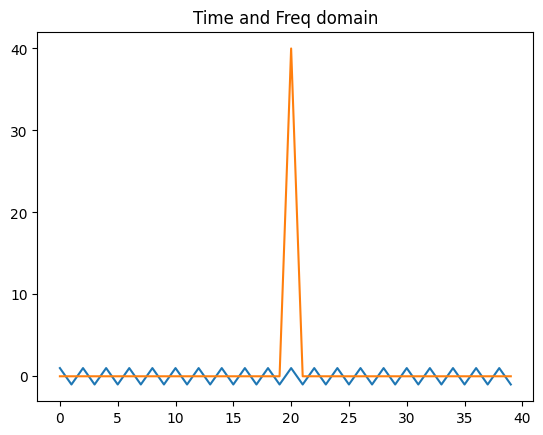

In [50]:
plot_multiple([
    (n, complex_exp_signal),
    (n, fft(complex_exp_signal))
], title='Time and Freq domain')

In [54]:
# Linearity check FFT(ax + by) = a*FFT(x) + b*FFT(y)

def verify_linearity():
    """
        3. **Verify FFT properties:**
        - Linearity: FFT(ax + by) = a*FFT(x) + b*FFT(y)
        - Time shift: FFT(x[n-k]) = e^(-j*2π*k*m/N) * FFT(x[n])
        - Frequency shift: FFT(x[n]*e^(j*2π*k*n/N)) = X[m-k]
        - Parseval's theorem: Energy in time = Energy in frequency
    """
    a = 3
    b = 2
    sin1 = np.cos(2*np.pi * f / 2 * n / fs)
    sin2 = np.cos(2*np.pi * 2 * f * n / fs)

    return np.allclose(
        fft( a * sin1 + b * sin2),
        a * fft(sin1) + b * fft(sin2)
    )

verify_linearity()

True

In [56]:
# the concept of shifting
x = np.arange(4)
k = 2
print(f'original: {x}')
print(f'rolled by k={k}: {np.roll(x, k)}')


original: [0 1 2 3]
rolled by k=2: [2 3 0 1]


verify time shift: True
verify frequency shift: True


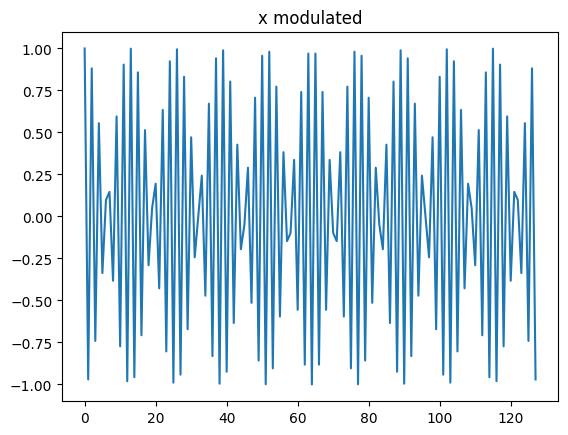

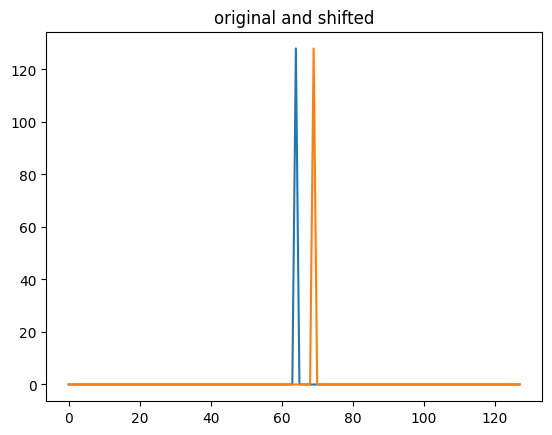

In [24]:
def verify_time_shift():
    """
    - Time shift: FFT(x[n-k]) = e^(-j*2π*k*m/N) * FFT(x[n])
    - Frequency shift: FFT(x[n]*e^(j*2π*k*n/N)) = X[m-k]
    - Parseval's theorem: Energy in time = Energy in frequency
    """
    f = 10  # freq
    fs = 2 * f # rate
    N = 128 # amount of samples power of 2 for manual implementation
    n = np.arange(N) # array representing samples
    x = np.cos( 2 * np.pi * f * n / fs)

    # shit signal by k-samples
    k = 4
    x_shifted = np.roll(x, k)
    X = fft(x)                   # output for normal
    X_shifted = fft(x_shifted)   # output for shifed

    # verify time shift
    m = np.arange(N)
    exp = np.exp(-2j * np.pi * k * m / N)
    print(f'verify time shift: {np.allclose(X_shifted, exp * X)}') 


    # verify frequency shift
    k = 5
    modulator = np.exp(2j * np.pi * k * n / N)
    x_modulated = x * modulator
    X_shifted_freq = fft(x_modulated)
    X_shifted_freq_ = np.roll(X, k)

    print(f'verify frequency shift: {np.allclose(X_shifted_freq, X_shifted_freq_)}') 

    plot_function(n, x_modulated, title='x modulated')
    # plot_function(n, X, title='wihtout freq shift')
    # plot_function(n, X_shifted_freq, title='x freq shifted')
    plot_multiple(
        [
            (n, X),
            (n, X_shifted_freq)
        ],
        title='original and shifted'
    )



verify_time_shift()


